# BUS 41204 Machine Learning Midterm
### Winter 2018
### Max Liu

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
import warnings
import random
warnings.filterwarnings("ignore")

## Question 1

## 1.1

We cannot use all of the variables to predict at the start of an auction whether it will be competitive. Specifically, we cannot use the "ClosePrice" variable because we would not know the close price of an auction item at the start of an auction. For obvious reasons we also cannot use the "Competitive?" variable because it is the value we are trying to compute. All of the other variables should be known at the start of an auction. One thing to note is the "Buy It Now" button on eBay, there is not enough data to know whether or not this button was used to purchase any of the auction items. Thus, we assume that at the beginning of each auction we would know the duration of the auction and the end day.

## 1.2

In [110]:
# we want to first load the data set and then parition it into 60% training and 40% validation
csv_file = "eBayAuctions.csv"
df = pd.read_csv(csv_file)

# label encode so that we can work with the categorical data
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['currency'] = le.fit_transform(df['currency'])
df['endDay'] = le.fit_transform(df['endDay'])

y = df['Competitive?']
x = df.drop(columns=['ClosePrice', 'Competitive?']) # we remove the variables that cannot be used
# want the dataframes to be numpy arrays
y = y.values
x = x.values

# split the data 60% training 40% validation
# NOTE: we are not running cross-validation to determine the best model
#       the models are being optimized against only the validation set that
#       we are taking from the whole training set
test_percent = 0.40
seed = 11
shuffle_data = True
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_percent,
                                                            random_state=seed,
                                                            shuffle=shuffle_data)

### Classification Tree

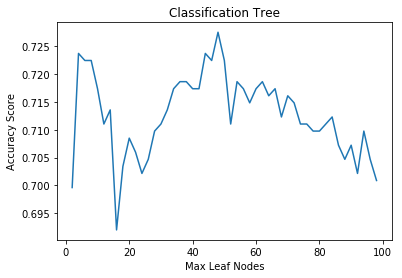

Best Accuracy Score: 0.727503
Best Max Leaf Nodes: 48.000000
[[226 145]
 [ 91 327]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 226 | 145 |
| 1 | 91 | 327 |


In [43]:
# we want to optimize the max leaf nodes of our classification tree
leaf_values = np.arange(2, 100, 2)
scores = []
best_score = 0
best_leaf = 0
for l in leaf_values:
    clf = DecisionTreeClassifier(max_leaf_nodes=l)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_leaf = l
    
scores = np.array(scores)

# plot the results
plt.plot(leaf_values, scores)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Classification Tree")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best Max Leaf Nodes: %f" % best_leaf)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Boosted Tree (AdaBoost)

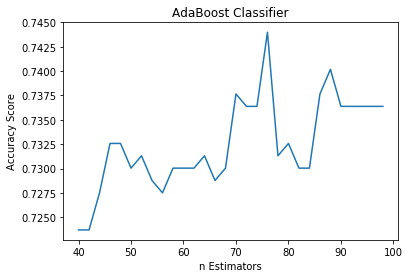

Best Accuracy Score: 0.743980
Best n Estimators:   76.000000
[[260 111]
 [ 97 321]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 260 | 111 |
| 1 | 97 | 321 |


In [44]:
# we want to optimize the n estimators of our AdaBoost classifier
n_values = np.arange(40, 100, 2) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy Score")
plt.title("AdaBoost Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Bagging Classifier

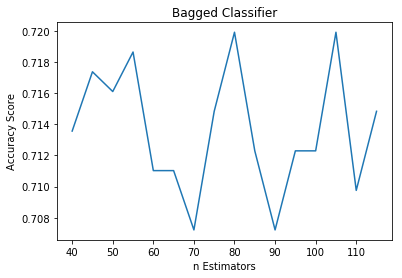

Best Accuracy Score: 0.719899
Best n Estimators:   80.000000
[[245 126]
 [ 99 319]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 245 | 126 |
| 1 | 99 | 319 |


In [53]:
# we want to optimize the n estimators of our Bagging classifier
n_values = np.arange(40, 120, 5) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = BaggingClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy Score")
plt.title("Bagged Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Random Forest Classifier

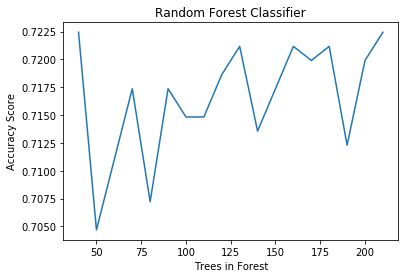

Best Accuracy Score: 0.722433
Best n Estimators:   40.000000
[[248 123]
 [ 96 322]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 248 | 123 |
| 1 | 96 | 322 |


In [57]:
# we want to optimize the n estimators of our Random Forest classifier
n_values = np.arange(40, 220, 10) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_n = 0
for n in n_values:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
    
scores = np.array(scores)

# plot the results
plt.plot(n_values, scores)
plt.xlabel("Trees in Forest")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best n Estimators:   %f" % best_n)

# now we want to display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

Note: There are quite a few other parameters that could have been optimized but for the sake of runability I chose the features that had the greatest impact on the performance of the model. Including other paramters would have caused these models to run in $n^2$ time.

## 1.3

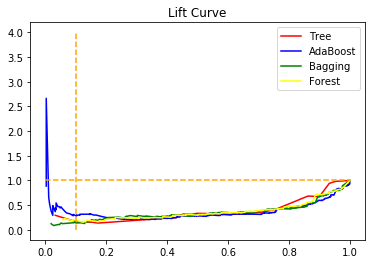

In [139]:
# create lift curve for the four models here
# classification tree, max leaf nodes 48
# boost, best n 76
# bagged, best n 80
# random forest classifier, best n 40

pp1 = DecisionTreeClassifier(max_leaf_nodes=48).fit(x_train, y_train).predict_proba(x_test)
pp2 = AdaBoostClassifier(n_estimators=76).fit(x_train, y_train).predict_proba(x_test)
pp3 = BaggingClassifier(n_estimators=80).fit(x_train, y_train).predict_proba(x_test)
pp4 = RandomForestClassifier(n_estimators=40).fit(x_train, y_train).predict_proba(x_test)

f1, t1, _ = roc_curve(y_test.ravel(), [i[0] for i in pp1])
f2, t2, _ = roc_curve(y_test.ravel(), [i[0] for i in pp2])
f3, t3, _ = roc_curve(y_test.ravel(), [i[0] for i in pp3])
f4, t4, _ = roc_curve(y_test.ravel(), [i[0] for i in pp4])

lift1 = t1/f1
lift2 = t2/f2
lift3 = t3/f3
lift4 = t4/f4

plt.plot(f1, lift1, color='red', label='Tree')
plt.plot(f2, lift2, color='blue', label='AdaBoost')
plt.plot(f3, lift3, color='green', label='Bagging')
plt.plot(f4, lift4, color='yellow', label='Forest')
plt.plot([0, 1], [1, 1], color='orange', linestyle='--')
plt.plot([0.1, 0.1], [0, 4], color='orange', linestyle='--')
plt.title("Lift Curve")
plt.legend()
plt.show()

From the vertical orange line we can see the lift for the top 10% of observations in the validation set

## 1.4

The concept behind all of the different classification trees are pretty similar. A tree with varying depth and leaf nodes is built out based on the training data and at each split the tree decides which direction to go. When we use the simple classification tree it is just building out one of these trees and using it as the model for classifying. This can be improved upon by using a Bagged tree, the difference being that a Bagged tree will use bootstrap with replacement to generate a variety of different training sets. Multiple trees are then built and we aggregate the predictions of all of the trees. Random Forest is a variation of of this where multiple trees are created but the correlation between each tree is reduced by taking different features as inputs. The best features are able to carry more weight in thi implementation. Boosting is separate from the other models because each of the trees is not built out independently but rather is built out sequentially and features with more importance will appear mroe frequently in the trees than other features.

# Question 2

## 2.1

The confusion matrix will look something like this:

|                 | respond        | did not respond |
|-----------------|----------------|-----------------|
| respond         | true positive  | false positive  |
| did not respond | false negative | true negative   |

Where the first column labels are the true values and the rows show what the classifier predicted the class was.

## 2.2

The confusion matrix for a model will be filled out by fitting our model with some training data set and the predicting the classes for a known test set. We can then compare how many of the respondants were classified as respondants by the model and how many respondants were classified as someone who would not respond. This would fill out the first line in our confusion matrix above. We could then do the same thing for those who did not respond to fill out the second row of our confusion matrix.

## 2.3

Based on the given information, we know that it costs \$0.50 to send a special offer to one of our existing customers (a budget of \$10,000 will allow us to send the offer to 20,000 existing customers). We also know that each customer that responds will give us \$1,000 in revenue (200 people responded the first time and created \$200,000 in revenue). In summary we know: $$\text{Benefit of responding:  \$999.50}$$ $$\text{Cost of not responding: \$0.50}$$

## 2.4

We can evaluate the performance of a model by taking the confusion matrix that we made above and normalizing all of the values. This will essentially give us a table of probabilities for our classification model. Next we take the cost and benefit numbers from above and we can create a table of the costs and benefits for each of the scenarios in our model (for example, the cost of a false negative would be \$0.50 and the benefit of a true positive would be \$999.50). Using these two tables we can then take the sum of the different probabilities to calculate the expected value of any given model. Using the expected value given by a model, we can compare this to the  expected values given by other models to choose the best one.

For the purposes of this problem, we would probably want to use a logistic regression or a support vector machine to help classify the customers as either likely to respond or not likely to respond. We can then use the above method to evaluate their performance against one another.

# Question 3

In [159]:
# begin by loading the data
csv_file = "Politics.csv"
df = pd.read_csv(csv_file)

# need to encode MOVED_AD
le = LabelEncoder()
df["MOVED_AD"] = le.fit_transform(df["MOVED_AD"]) # Y-1, N-0
#remove VOTER_ID
df = df.drop(columns=['VOTER_ID'])

# split the test and validation partitions
train = df.loc[df['Partition'] == 'T']
validation = df.loc[df['Partition'] == 'V']
# now we can drop the parition column also
train = train.drop(columns=['Partition'])
validation = validation.drop(columns=['Partition'])

# split into x and y
train_y = train['MOVED_AD']
train_x = train.drop(columns=['MOVED_AD'])
validation_y = validation['MOVED_AD']
validation_x = validation.drop(columns=['MOVED_AD'])

## 3.1

In [68]:
# we iterate through and see how many people moved after getting the message
# and how many moved after not getting a message
messaged = 0
messaged_moved = 0
not_messaged = 0
not_messaged_moved = 0

for index, row in df.iterrows():
    if row['MESSAGE_A'] == 1:
        messaged += 1
        if row['MOVED_AD'] == 1:
            messaged_moved += 1
    else:
        not_messaged += 1
        if row['MOVED_AD'] == 1:
            not_messaged_moved += 1
            
print("Total Messaged: %i, Total Moved: %i" % (messaged, messaged_moved))
print("This is %f%%" % ((messaged_moved/messaged)*100))
print("Total Not Messaged: %i, Total Moved: %i" % (not_messaged, not_messaged_moved))
print("This is %f%%" % ((not_messaged_moved/not_messaged)*100))

Total Messaged: 5000, Total Moved: 2012
This is 40.240000%
Total Not Messaged: 5000, Total Moved: 1722
This is 34.440000%


It looks like the message had some effect in moving the voters in a Democratic direction. However, relative to how many people moved after not receving a message, it looks like the effect was not extremely great. It is possible that a 6% increase has a much greater effect in the election as a whole but in the context of the current data set it would be interesting to see if the additional 6% is due to the message or some other factor and or chance.

## 3.2

### Proposed Approach

#### Selecting Input Variables

We will determine the features that we want by running a random forest and figuring out which variables are the best signals for classifying voters.

#### Selected Models

Because of the classification problem we are faced with (the classification is binary, does the voter move in a Democratic direction or do they not) we can use specialized models that are very good at solving this kind of problem. In order, we will use a support vector machine, logistic regression, and a perceptron classifier.

In [142]:
# we want to first select the input variables
clf = RandomForestClassifier(n_estimators=n)
clf.fit(train_x, train_y)

importance = clf.feature_importances_
headers = train_x.columns

d = []
for i in range(len(headers)):
    d.append((importance[i], headers[i]))

d.sort(key=lambda tup: tup[0], reverse=True)
# you can uncomment this if you want to see the full ranking of feature importance
# print(d)

# I want to use all of the features with an importance over 1%
# using all of the others may be not very helpful and increase the model runtime
features_to_use = []
features_to_remove = []
for t in d:
    if t[0] < 0.01:
        features_to_remove.append(t[1])
    else:
        features_to_use.append(t[1])
        
print(features_to_use)

['AGE', 'REG_DAYS', 'PARTY_R', 'PARTY_D', 'HH_ND', 'E_PELIG', 'HH_NR', 'G_PELIG', 'NL5G', 'HH_NI', 'PARTY_I', 'MEDIANEDUC', 'GENDER_F', 'GENDER_M', 'NH_AA', 'ED_4COL', 'MESSAGE_A', 'NH_WHITE', 'M_MAR', 'VG_12', 'COMM_CAR', 'MED_HH_INC', 'F_MAR', 'COMM_609P', 'COMM_LT10', 'COMM_PT', 'KIDS', 'MED_AGE', 'COMM_CP', 'HISP', 'VG_08', 'VG_10', 'AP_PELIG']


The features presented above are the features that we will feed into our model to train it to classify voters

In [160]:
# remove the values that we dont want
# train_y, train_x, validation_x, validation_y
train_x = train_x.drop(columns=features_to_remove)
validation_x = validation_x.drop(columns=features_to_remove)

# convert to numpy arrays
train_x = train_x.values
train_y = train_y.values
validation_x = validation_x.values
validation_y = validation_y.values

### Support Vector Classifier

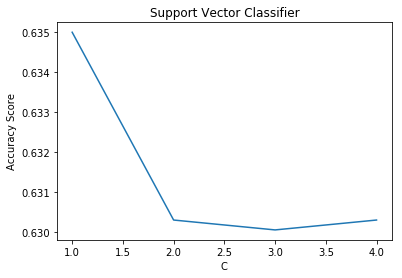

Best Accuracy Score: 0.634995
Best C:   1.000000
[[2484   87]
 [1411   70]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 2484 | 87 |
| 1 | 1411 | 70 |


In [144]:
c_values = np.arange(1, 5, 1)
scores = []
best_score = 0
best_c = 0
for c in c_values:
    clf = SVC(C=c)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(validation_x)
    score = accuracy_score(validation_y, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_c = c
    
scores = np.array(scores)

# plot the results
plt.plot(c_values, scores)
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.title("Support Vector Classifier")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best C:   %f" % best_c)

# now we want to display the confusion matrix
cm = confusion_matrix(validation_y, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Logistic Regression

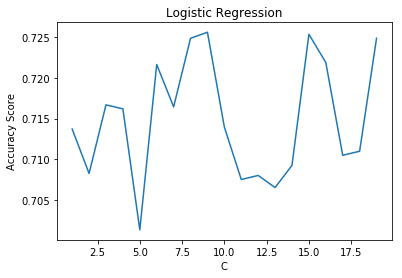

Best Accuracy Score: 0.725568
Best C:   9.000000
[[2096  475]
 [ 640  841]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 2096 | 475 |
| 1 | 640 | 841 |


In [140]:
c_values = np.arange(1, 20, 1) # a variety of ranges were tested but the optimal was in this region
scores = []
best_score = 0
best_c = 0
for c in c_values:
    clf = LogisticRegression(C=c)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(validation_x)
    score = accuracy_score(validation_y, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_c = c
    
scores = np.array(scores)

# plot the results
plt.plot(c_values, scores)
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best C:   %f" % best_c)

# now we want to display the confusion matrix
cm = confusion_matrix(validation_y, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Perceptron

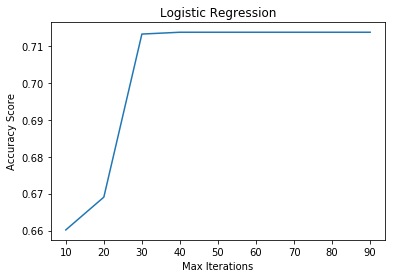

Best Accuracy Score: 0.713722
Best Max Iteration:   40.000000
[[2156  415]
 [ 745  736]]
Confusion Matrix
|   | 0  | 1  |
---------------
| 0 | 2156 | 415 |
| 1 | 745 | 736 |


In [108]:
iter_values = np.arange(10, 100, 10)
scores = []
best_score = 0
best_i = 0
for i in iter_values:
    clf = LogisticRegression(max_iter=i)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(validation_x)
    score = accuracy_score(validation_y, y_pred)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_i = i
    
scores = np.array(scores)

# plot the results
plt.plot(iter_values, scores)
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression")
plt.show()

print("Best Accuracy Score: %f" % best_score)
print("Best Max Iteration:   %f" % best_i)

# now we want to display the confusion matrix
cm = confusion_matrix(validation_y, y_pred)
print(cm)
print("Confusion Matrix")
print("|   | 0  | 1  |")
print("---------------")
print("| 0 | %i | %i |" % (cm[0][0], cm[0][1]))
print("| 1 | %i | %i |" % (cm[1][0], cm[1][1]))

### Chosen Model

The model with the best results using the current data set is the logistic regression. We choose this model because it has the highest accuracy score and relatively better results from the confusion matrix than the other 2 models. This makes sense as a linear logistic regression is built exactly to solve the type of problem that we are looking at right now and performing a binary classification.

## 3.3

In [149]:
# propensities for first 3 records in validation set
# using logistic regression with a C of 9
clf = LogisticRegression(C=9)
clf.fit(train_x, train_y)

#first 3 rows of validation_x
top_3 = validation_x[0:3]

# predict probabilities
pp = clf.predict_proba(top_3)

print("Record 1: %f" % pp[0][1])
print("Record 2: %f" % pp[1][1])
print("Record 3: %f" % pp[2][1])

Record 1: 0.456225
Record 2: 0.248753
Record 3: 0.376904


## 3.4

In [162]:
# the last column in the array is the MESSAGE_A feature
# lets take our validation_x column and change all of the MESSAGE_A to 1
# and then run it through our model
# and then we will do the same by changing all of the MESSAGE_A to 0
# and then we can subtract to find uplift

validation_x_1 = validation_x
validation_x_0 = validation_x

for record in validation_x_1:
    record[-1] = 1
    
pp1 = clf.predict_proba(validation_x_1)
prob_moved_1 = []
for p in pp1:
    prob_moved_1.append(p[1])
    
for record in validation_x_0:
    record[-1] = 0
    
pp2 = clf.predict_proba(validation_x_0)
prob_moved_0 = []
for p in pp2:
    prob_moved_0.append(p[1])

# here we have the uplift of the all of the records
uplift = np.array(prob_moved_1) - np.array(prob_moved_0)

# the uplift for the first 3 records in validation
print("Uplift for Record 1: %f" % uplift[0])
print("Uplift for Record 2: %f" % uplift[1])
print("Uplift for Record 3: %f" % uplift[2])

Uplift for Record 1: 0.018464
Uplift for Record 2: 0.013697
Uplift for Record 3: 0.017376


In [168]:
# now lets look at what the uplift looks like for the top 10%
total_records = len(uplift)
top_10 = int(total_records*0.10)
uplift_s = sorted(uplift, reverse=True)

print("The uplift cutoff for the top 10%% is an uplift of %f" % uplift_s[top_10 - 1])

The uplift cutoff for the top 10% is an uplift of 0.018579


In [180]:
# now lets find all of the records with an uplift greater than 0.018579
rows = []
for i in range(len(uplift)):
    if uplift[i] >= 0.018579:
        rows.append(i)
        
# now we can calculate the percent of people that moved that also had a high uplift
total = 0
moved = 0
for i in rows:
    total += 1
    if validation_y[i] == 1:
        moved +=1  
print("Percent of the top 10%% uplift that moved: %f" % (moved/total))

# now lets pick random variables and see what percent of people moved
rand = random.sample(range(total_records), 405)
total = 0
moved = 0
for i in rand:
    total += 1
    if validation_y[i] == 1:
        moved +=1    
print("Percent of random selection that moved: %f" % (moved/total))

Percent of the top 10% uplift that moved: 0.525926
Percent of random selection that moved: 0.338272


I ran the above code multiple times and the random selection percentage that moved was consistently around 34%. However, when we look at the top 10% of voters with the highest uplift, we find that 52% of them actually moved. So by targeting voters with a high uplift, we are actually doing better than random targeting by 18% which is pretty significant.